In [2]:
import calendar

import pandas as pd
import numpy as np

hotel: 예약한 호텔의 종류 (예: Resort Hotel, City Hotel)
is_canceled: 예약이 취소되었는지 여부 (1: 취소, 0: 취소되지 않음)
lead_time: 예약이 이루어진 날짜와 체크인 날짜 간의 기간 (일)
arrival_date_year: 도착한 연도
arrival_date_month: 도착한 월
arrival_date_week_number: 도착한 주 (연중 주 단위)
arrival_date_day_of_month: 도착한 날짜
stays_in_weekend_nights: 주말에 머무른 밤 수
stays_in_week_nights: 주중에 머무른 밤 수
adults: 성인 수
children: 아이(들) 수
babies: 유아 수
meal: 예약된 식사 유형 (BB: Bed & Breakfast, HB: Half board, FB: Full board, Undefined: 식사 포함되지 않음)
country: 예약한 고객의 국적
market_segment: 예약한 고객의 시장 세그먼트 (예: Online Travel Agents, Offline Travel Agents, Direct)
distribution_channel: 예약한 고객의 예약 채널 (예: TA/TO: Travel Agents/Tour Operators, Direct: 직접 예약)
is_repeated_guest: 반복 예약 고객 여부 (1: 반복 예약 고객, 0: 새로운 예약 고객)
previous_cancellations: 이전 예약 취소 횟수
previous_bookings_not_canceled: 이전 예약 취소되지 않은 횟수
reserved_room_type: 예약된 객실 유형
assigned_room_type: 할당된 객실 유형
booking_changes: 예약 변경 횟수
deposit_type: 보증금 유형
agent: 예약을 처리한 여행사 ID
company: 예약을 처리한 회사/기업 ID
days_in_waiting_list: 예약 처리를 위해 대기 중인 일 수
customer_type: 고객 유형 (Contract: 계약, Group: 그룹, Transient: 일반, Transient-Party: 일반 파티)
adr: 평균 일일 요금 (Average Daily Rate)
required_car_parking_spaces: 요청된 주차 공간 수
total_of_special_requests: 요청된 특별 요청의 총 수
reservation_status: 예약 상태 (Canceled: 취소, Check-Out: 체크아웃, No-Show: 노쇼)
reservation_status_date: 예약 상태의 날짜

In [3]:
hotel_DF = pd.read_csv('hotel_bookings.csv')
hotel_DF.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
hotel_DF.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
# country 값 결측치 None
hotel_DF['country'] = hotel_DF['country'].fillna('None')
# company = 결측값 너무 많아서 해당 열은 삭제
hotel_DF = hotel_DF.drop(['company'], axis=1)
# agent = 결측치 0으로 대체
hotel_DF['agent'] = hotel_DF['agent'].fillna(0)
# children = 결측치 0으로 대체
hotel_DF['children'] = hotel_DF['children'].fillna(0)

In [6]:
hotel_DF.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

<Figure size 1000x600 with 0 Axes>

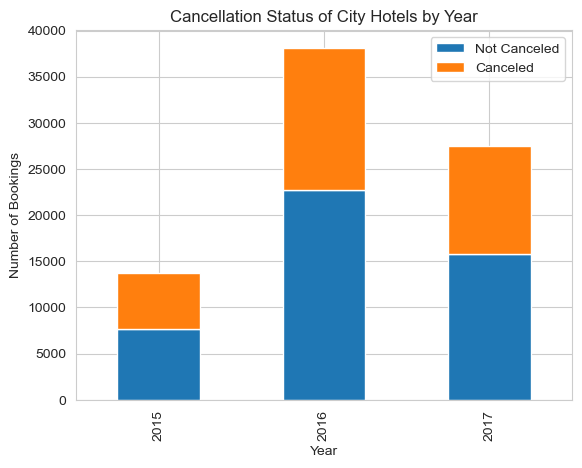

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


# 시티호텔 데이터만 추출
city_hotel_data = hotel_DF[hotel_DF['hotel'] == 'City Hotel']

# 연도별 is_canceled에 따른 빈도 계산
canceled_counts_by_year = city_hotel_data.groupby(['arrival_date_year', 'is_canceled']).size().unstack()

# 그래프 그리기
plt.figure(figsize=(10, 6))
canceled_counts_by_year.plot(kind='bar', stacked=True)
plt.title("Cancellation Status of City Hotels by Year")
plt.xlabel("Year")
plt.ylabel("Number of Bookings")
plt.legend(["Not Canceled", "Canceled"], loc='upper right')
plt.show()


In [8]:
city_hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,0,No Deposit,6.0,0,Transient,0.00,0,0,Check-Out,2015-07-03
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,0,No Deposit,9.0,0,Transient,76.50,0,1,Canceled,2015-07-01
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,0,No Deposit,9.0,0,Transient,68.00,0,1,Canceled,2015-04-30
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,0,No Deposit,9.0,0,Transient,76.50,0,2,Canceled,2015-06-23
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,0,No Deposit,9.0,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


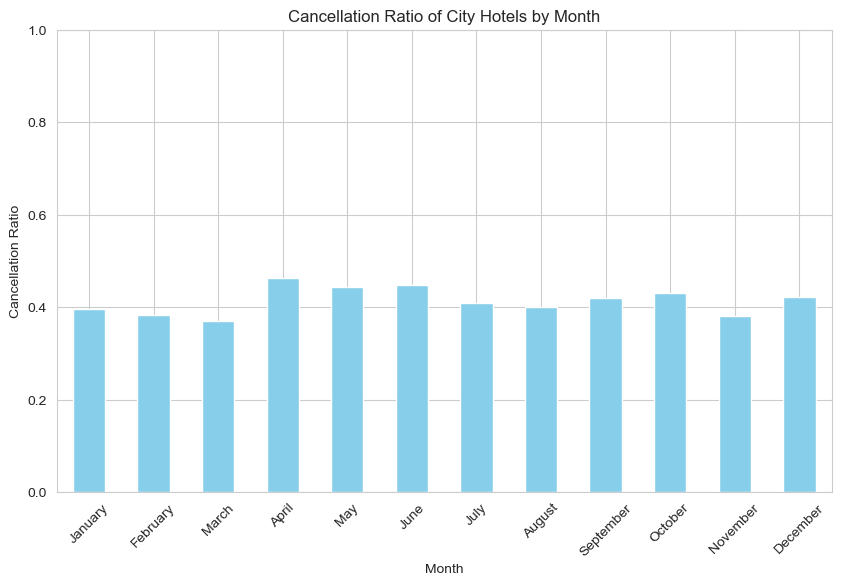

In [9]:


# 시티호텔 데이터만 추출
city_hotel_data = hotel_DF[hotel_DF['hotel'] == 'City Hotel']

# 월별 취소된 예약과 취소되지 않은 예약의 수 계산
canceled_counts_by_month = city_hotel_data.groupby(['arrival_date_month', 'is_canceled']).size().unstack()

# 취소 비율 계산
canceled_counts_by_month['total'] = canceled_counts_by_month.sum(axis=1)
canceled_counts_by_month['canceled_ratio'] = canceled_counts_by_month[1] / canceled_counts_by_month['total']

# 월별 취소 비율 그래프 그리기
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
canceled_counts_by_month.loc[months_order, 'canceled_ratio'].plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title("Cancellation Ratio of City Hotels by Month")
plt.xlabel("Month")
plt.ylabel("Cancellation Ratio")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # y축 범위를 0부터 1까지로 설정하여 비율을 나타냄
plt.show()


In [10]:
# 고만고만하다 큰 차이는 없다
# 4월이 취소율이 가장 높고 11월이 취소율이 가장 낮다

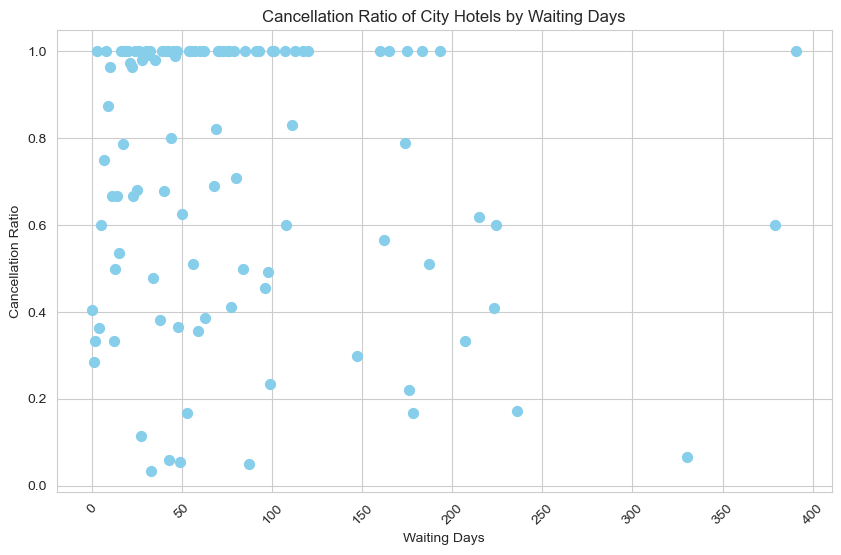

In [11]:
# 대기가 길어질수록 취소율이 높아질까 ? 확인해보자
import pandas as pd
import matplotlib.pyplot as plt



# 시티호텔 데이터만 추출
city_hotel_data = hotel_DF[hotel_DF['hotel'] == 'City Hotel']

# 대기 기간별 취소된 예약과 취소되지 않은 예약의 수 계산
canceled_counts_by_waiting_days = city_hotel_data.groupby(['days_in_waiting_list', 'is_canceled']).size().unstack()

# 취소 비율 계산
canceled_counts_by_waiting_days['total'] = canceled_counts_by_waiting_days.sum(axis=1)
canceled_counts_by_waiting_days['canceled_ratio'] = canceled_counts_by_waiting_days[1] / canceled_counts_by_waiting_days['total']

# 산점도 그래프 그리기
plt.figure(figsize=(10, 6))
plt.scatter(canceled_counts_by_waiting_days.index, canceled_counts_by_waiting_days['canceled_ratio'], color='skyblue', s=50)
plt.title("Cancellation Ratio of City Hotels by Waiting Days")
plt.xlabel("Waiting Days")
plt.ylabel("Cancellation Ratio")
plt.xticks(rotation=45)
#plt.grid(True)  # 그리드 표시
plt.show()


In [12]:
# 보증금 유형 => No deposit >0 / Non Refun > 1 / Refundable > 2

In [13]:
# 'deposit_type' 값을 수치 데이터로 변환
city_hotel_data['deposit_type'] = city_hotel_data['deposit_type'].replace({'No Deposit': 0, 'Non Refund': 1, 'Refundable': 2})

# 변환된 데이터 확인
print(city_hotel_data['deposit_type'].value_counts())


deposit_type
0    66442
1    12868
2       20
Name: count, dtype: int64


C:\Users\desktop\AppData\Local\Temp\ipykernel_16120\3515676033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_hotel_data['deposit_type'] = city_hotel_data['deposit_type'].replace({'No Deposit': 0, 'Non Refund': 1, 'Refundable': 2})


In [14]:
city_hotel_data['reservation_status'] = city_hotel_data['reservation_status'].replace({'Canceled': 0, 'No-Show': 0, 'Check-Out': 1})

C:\Users\desktop\AppData\Local\Temp\ipykernel_16120\2302058128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_hotel_data['reservation_status'] = city_hotel_data['reservation_status'].replace({'Canceled': 0, 'No-Show': 0, 'Check-Out': 1})


In [15]:
city_hotel_data.corr(numeric_only=True)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
is_canceled,1.000000,0.309242,-0.003004,0.001580,-0.004331,-0.007343,0.048704,0.053054,-0.027089,-0.030186,...,0.166643,-0.053134,-0.149500,0.517503,0.011632,0.060965,-0.011965,-0.133096,-0.293889,-1.000000
lead_time,0.309242,1.000000,0.027876,0.130392,0.014502,-0.023913,0.058361,0.115792,-0.053553,-0.030333,...,0.122511,-0.065472,-0.031052,0.423353,0.034217,0.187110,-0.137240,-0.077727,-0.132450,-0.309242
arrival_date_year,-0.003004,0.027876,1.000000,-0.543027,-0.002910,0.034851,0.066234,0.067558,0.055555,-0.008407,...,-0.195255,0.021302,0.032124,-0.076140,0.132066,-0.068701,0.248757,-0.001035,0.135439,0.003004
arrival_date_week_number,0.001580,0.130392,-0.543027,1.000000,0.061681,-0.001043,-0.008598,0.006947,-0.001221,0.005450,...,0.037032,-0.012149,0.002471,0.013107,-0.049228,0.017696,0.017194,-0.003850,0.015773,-0.001580
arrival_date_day_of_month,-0.004331,0.014502,-0.002910,0.061681,1.000000,0.000304,-0.011713,-0.001357,0.012839,0.000354,...,-0.010891,-0.001855,0.014104,-0.007314,0.007973,0.023152,0.023913,0.003864,-0.001676,0.004331
stays_in_weekend_nights,-0.007343,-0.023913,0.034851,-0.001043,0.000304,1.000000,0.219601,0.082130,0.037525,0.006467,...,-0.038613,-0.027498,0.045574,-0.115254,-0.028544,-0.056195,0.037020,-0.024373,0.068762,0.007343
stays_in_week_nights,0.048704,0.058361,0.066234,-0.008598,-0.011713,0.219601,1.000000,0.088253,0.037116,0.005469,...,-0.050589,-0.040931,0.079888,-0.056306,-0.015468,0.015854,0.057036,-0.038363,0.064186,-0.048704
adults,0.053054,0.115792,0.067558,0.006947,-0.001357,0.082130,0.088253,1.000000,-0.005845,0.012157,...,-0.038085,-0.109113,-0.087555,-0.040523,-0.088864,-0.007731,0.262895,0.011194,0.155642,-0.053054
children,-0.027089,-0.053553,0.055555,-0.001221,0.012839,0.037525,0.037116,-0.005845,1.000000,0.023773,...,-0.043777,-0.017290,0.046912,-0.107565,-0.055850,-0.036441,0.311955,0.054963,0.112702,0.027089
babies,-0.030186,-0.030333,-0.008407,0.005450,0.000354,0.006467,0.005469,0.012157,0.023773,1.000000,...,-0.008729,-0.003257,0.066209,-0.025785,-0.002960,-0.009053,0.013697,0.019732,0.072491,0.030186


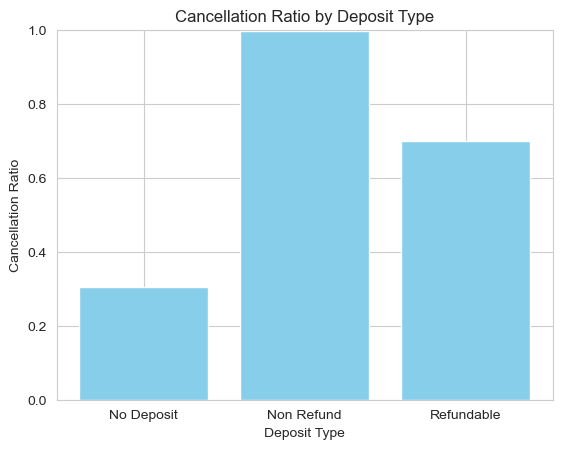

In [16]:
# 보증금에 따른 취소 비율 그래프로 나타내기
# 'deposit_type'으로 그룹화하여 취소 비율 계산
canceled_ratio_by_deposit_type = city_hotel_data.groupby('deposit_type')['is_canceled'].mean()

# 그래프 그리기
plt.bar(canceled_ratio_by_deposit_type.index, canceled_ratio_by_deposit_type.values, color='skyblue')
plt.title("Cancellation Ratio by Deposit Type")
plt.xlabel("Deposit Type")
plt.ylabel("Cancellation Ratio")
plt.xticks(canceled_ratio_by_deposit_type.index, ['No Deposit', 'Non Refund', 'Refundable'])
plt.ylim(0, 1)  # y축 범위를 0부터 1까지로 설정하여 비율을 나타냄
plt.show()
# 왜 환불불가인데 취소율이 높을까?


C:\Users\desktop\anaconda3\envs\EXAM_ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


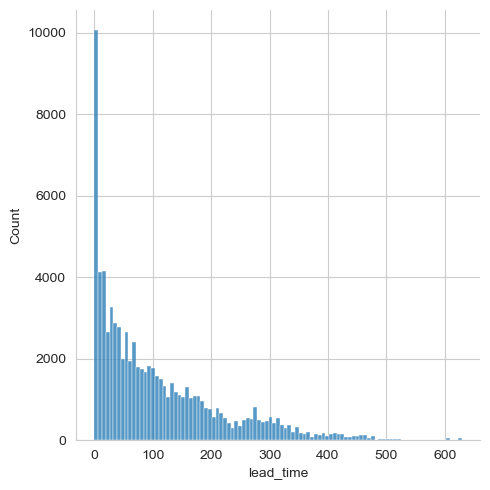

In [17]:
import seaborn as sns
sns.displot(city_hotel_data['lead_time'])

<Axes: >

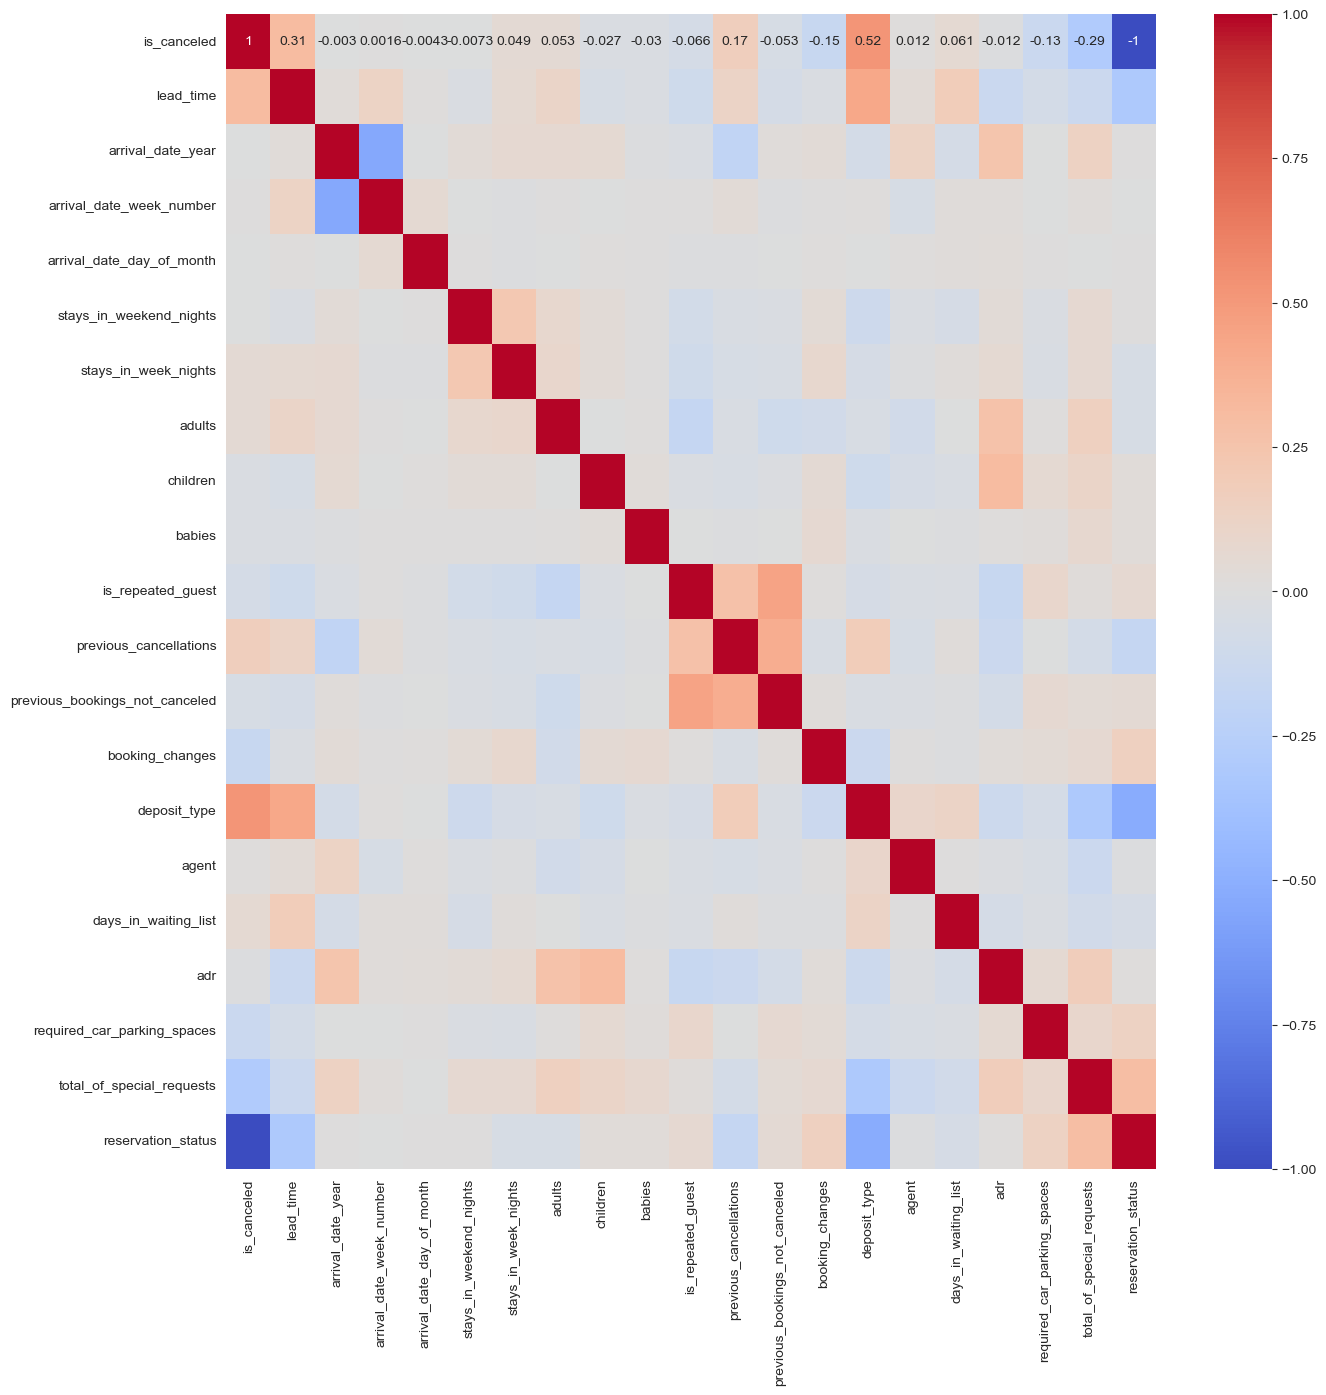

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(city_hotel_data.corr(numeric_only=True), cmap='coolwarm',vmax=1, vmin=-1,annot=True)

In [19]:
# 성인, 아이, 아기를 포함한 people이라는 파생변수 생성
city_hotel_data['people'] = city_hotel_data['adults'] + city_hotel_data['children'] + city_hotel_data['babies']
city_hotel_data.head()

C:\Users\desktop\AppData\Local\Temp\ipykernel_16120\644365032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_hotel_data['people'] = city_hotel_data['adults'] + city_hotel_data['children'] + city_hotel_data['babies']


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,people
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,0,6.0,0,Transient,0.0,0,0,1,2015-07-03,1.0
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,0,9.0,0,Transient,76.5,0,1,0,2015-07-01,2.0
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,0,9.0,0,Transient,68.0,0,1,0,2015-04-30,1.0
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,0,9.0,0,Transient,76.5,0,2,0,2015-06-23,2.0
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,0,9.0,0,Transient,76.5,0,1,0,2015-04-02,2.0


In [20]:
# 인원수가 0명인 데이터 삭제
city_hotel_data[city_hotel_data['people']==0]
city_hotel_data= city_hotel_data[city_hotel_data['people']!=0]

In [21]:
# 며칠 묵었는지(total_night) 변수생성
city_hotel_data['total_night'] =city_hotel_data['stays_in_week_nights'] +city_hotel_data['stays_in_weekend_nights']
city_hotel_data['total_night'].head()

40060    2
40061    4
40062    4
40063    6
40064    2
Name: total_night, dtype: int64

In [22]:
# total_nights가 0인 데이터
city_hotel_data[city_hotel_data['total_night']==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,people,total_night
40533,City Hotel,0,0,2015,July,31,28,0,0,2,...,0.0,0,Transient,0.0,0,0,1,2015-07-28,2.0,0
40534,City Hotel,0,0,2015,July,31,28,0,0,2,...,0.0,0,Transient,0.0,0,0,1,2015-07-28,2.0,0
41021,City Hotel,0,0,2015,August,33,11,0,0,2,...,0.0,0,Transient,0.0,0,0,1,2015-08-11,2.0,0
41139,City Hotel,0,0,2015,August,33,13,0,0,2,...,0.0,0,Contract,0.0,0,2,1,2015-08-13,2.0,0
42024,City Hotel,0,0,2015,August,36,30,0,0,1,...,0.0,0,Transient,0.0,0,0,1,2015-08-30,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,City Hotel,0,15,2017,July,27,6,0,0,1,...,14.0,0,Transient-Party,0.0,0,0,1,2017-07-06,1.0,0
117701,City Hotel,0,0,2017,August,32,8,0,0,2,...,262.0,0,Transient,0.0,0,0,1,2017-08-08,2.0,0
118029,City Hotel,0,0,2017,August,33,14,0,0,2,...,0.0,0,Transient,0.0,0,0,1,2017-08-14,2.0,0
118631,City Hotel,0,78,2017,August,34,23,0,0,1,...,98.0,0,Transient-Party,0.0,0,0,1,2017-08-23,1.0,0


In [23]:
# 취소율(이전의 취소 횟수 / 취소된 횟수 + 이전에 취소된 횟수) 컬럼 만들기
city_hotel_data['cancel_rate'] = city_hotel_data['previous_cancellations']/(city_hotel_data['previous_cancellations'] + city_hotel_data['previous_bookings_not_canceled'])

In [24]:
city_hotel_data[city_hotel_data['cancel_rate'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,people,total_night,cancel_rate
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,0,Transient,0.00,0,0,1,2015-07-03,1.0,2,NaN
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,0,Transient,76.50,0,1,0,2015-07-01,2.0,4,NaN
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,0,Transient,68.00,0,1,0,2015-04-30,1.0,4,NaN
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,0,Transient,76.50,0,2,0,2015-06-23,2.0,6,NaN
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,0,Transient,76.50,0,1,0,2015-04-02,2.0,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,Transient,96.14,0,0,1,2017-09-06,2.0,7,NaN
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,Transient,225.43,0,2,1,2017-09-07,3.0,7,NaN
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,Transient,157.71,0,4,1,2017-09-07,2.0,7,NaN
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,Transient,104.40,0,0,1,2017-09-07,2.0,7,NaN


In [25]:
# 방문한 적 있지만 취소한 적 없는 경우
city_hotel_data[~city_hotel_data['cancel_rate'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,people,total_night,cancel_rate
73714,City Hotel,1,265,2015,July,28,9,0,2,2,...,0,Transient-Party,62.8,0,0,0,2014-10-17,2.0,2,1.0
73715,City Hotel,1,258,2015,July,27,2,0,2,2,...,0,Transient-Party,62.8,0,0,0,2014-10-17,2.0,2,1.0
73716,City Hotel,1,258,2015,July,27,2,0,2,2,...,0,Transient-Party,62.8,0,0,0,2014-10-17,2.0,2,1.0
73717,City Hotel,1,258,2015,July,27,2,0,2,2,...,0,Transient-Party,62.8,0,0,0,2014-10-17,2.0,2,1.0
73718,City Hotel,1,258,2015,July,27,2,0,2,2,...,0,Transient-Party,62.8,0,0,0,2014-10-17,2.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117424,City Hotel,0,3,2017,August,35,31,0,1,2,...,0,Transient,95.0,0,4,1,2017-09-01,3.0,1,0.0
117841,City Hotel,0,7,2017,August,35,30,0,2,1,...,0,Transient,65.0,0,2,1,2017-09-01,1.0,2,0.0
118581,City Hotel,0,11,2017,August,34,25,0,2,2,...,0,Group,125.0,0,0,1,2017-08-27,2.0,2,0.0
118651,City Hotel,0,189,2017,August,35,27,2,0,2,...,0,Transient-Party,119.0,0,3,1,2017-08-29,2.0,2,0.0


In [26]:
# 취소한 적이 한번이라도 있는 경우
city_hotel_data[city_hotel_data['cancel_rate']>0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,people,total_night,cancel_rate
73714,City Hotel,1,265,2015,July,28,9,0,2,2,...,0,Transient-Party,62.8,0,0,0,2014-10-17,2.0,2,1.000000
73715,City Hotel,1,258,2015,July,27,2,0,2,2,...,0,Transient-Party,62.8,0,0,0,2014-10-17,2.0,2,1.000000
73716,City Hotel,1,258,2015,July,27,2,0,2,2,...,0,Transient-Party,62.8,0,0,0,2014-10-17,2.0,2,1.000000
73717,City Hotel,1,258,2015,July,27,2,0,2,2,...,0,Transient-Party,62.8,0,0,0,2014-10-17,2.0,2,1.000000
73718,City Hotel,1,258,2015,July,27,2,0,2,2,...,0,Transient-Party,62.8,0,0,0,2014-10-17,2.0,2,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111356,City Hotel,0,10,2017,June,25,22,0,1,1,...,0,Transient,65.0,0,0,1,2017-06-23,1.0,1,0.200000
111357,City Hotel,0,20,2017,July,28,11,0,3,1,...,0,Transient,65.0,0,0,1,2017-07-14,1.0,3,0.166667
111358,City Hotel,0,8,2017,July,30,25,0,1,1,...,0,Transient,65.0,1,0,1,2017-07-26,1.0,1,0.142857
111359,City Hotel,0,13,2017,August,35,29,0,1,1,...,0,Transient,65.0,0,0,1,2017-08-30,1.0,1,0.125000


In [27]:
# NAN값 별도의 카테고리 만들기 위해 -1로 채우기
city_hotel_data['cancel_rate']=city_hotel_data['cancel_rate'].fillna(-1)
city_hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79163 entries, 40060 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           79163 non-null  object 
 1   is_canceled                     79163 non-null  int64  
 2   lead_time                       79163 non-null  int64  
 3   arrival_date_year               79163 non-null  int64  
 4   arrival_date_month              79163 non-null  object 
 5   arrival_date_week_number        79163 non-null  int64  
 6   arrival_date_day_of_month       79163 non-null  int64  
 7   stays_in_weekend_nights         79163 non-null  int64  
 8   stays_in_week_nights            79163 non-null  int64  
 9   adults                          79163 non-null  int64  
 10  children                        79163 non-null  float64
 11  babies                          79163 non-null  int64  
 12  meal                            

In [28]:
# 데이터 타입이 object인 컬럼 list에 추가하기
obj_list = []
for i in city_hotel_data.columns:
    if city_hotel_data[i].dtype== 'object':
        obj_list.append(i)

In [29]:
for i in obj_list:
    print(i, city_hotel_data[i].nunique())

hotel 1
arrival_date_month 12
meal 4
country 167
market_segment 8
distribution_channel 5
reserved_room_type 7
assigned_room_type 8
customer_type 4
reservation_status_date 864


In [30]:
# country와 meal 제거하기
city_hotel_data.drop(['country','meal'], axis=1, inplace=True)

In [31]:
obj_list.remove('country')
obj_list.remove('meal')

In [32]:
city_hotel_data=pd.get_dummies(city_hotel_data, columns=obj_list)
city_hotel_data.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reservation_status_date_2017-08-29,reservation_status_date_2017-08-30,reservation_status_date_2017-08-31,reservation_status_date_2017-09-01,reservation_status_date_2017-09-02,reservation_status_date_2017-09-03,reservation_status_date_2017-09-04,reservation_status_date_2017-09-05,reservation_status_date_2017-09-06,reservation_status_date_2017-09-07
40060,0,6,2015,27,1,0,2,1,0.0,0,...,False,False,False,False,False,False,False,False,False,False
40061,1,88,2015,27,1,0,4,2,0.0,0,...,False,False,False,False,False,False,False,False,False,False
40062,1,65,2015,27,1,0,4,1,0.0,0,...,False,False,False,False,False,False,False,False,False,False
40063,1,92,2015,27,1,2,4,2,0.0,0,...,False,False,False,False,False,False,False,False,False,False
40064,1,100,2015,27,2,0,2,2,0.0,0,...,False,False,False,False,False,False,False,False,False,False


In [33]:
# 학습데이터와 테스트데이터 분리

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(city_hotel_data.drop('is_canceled',axis=1),city_hotel_data['is_canceled'], test_size=0.3, random_state=123)

In [34]:
# 랜덤 포레스트로 분류해보자 !!
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
pred1 = rf_model.predict(X_test)

In [35]:
pred1

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [36]:
proba1=rf_model.predict_proba(X_test)

In [37]:
proba1

array([[1.  , 0.  ],
       [0.05, 0.95],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.96, 0.04]])

In [38]:
proba1[0]

array([1., 0.])

In [39]:
proba1[:,1]

array([0.  , 0.95, 0.  , ..., 0.  , 1.  , 0.04])

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score

In [41]:
accuracy_score(y_test,pred1)

0.9998736788917428

In [42]:
y_pred = rf_model.predict(X_test)
f1_score=(y_test,y_pred)

In [43]:
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [44]:
f1_score

(92564     0
 78843     1
 98127     0
 91124     0
 98529     0
          ..
 81215     0
 61020     1
 75583     0
 47335     1
 114121    0
 Name: is_canceled, Length: 23749, dtype: int64,
 array([0, 1, 0, ..., 0, 1, 0], dtype=int64))

In [45]:
print(f'score:{rf_model.score(X_train,y_train)}')

score:1.0


In [46]:
print(f'score:{rf_model.score(X_test,y_test)}')

score:0.9998736788917428


In [47]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

C:\Users\desktop\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)


KNeighborsClassifier()

In [65]:
# 동일 데이터셋으로 병렬 학습 진행할 모델 리스트 선정 및 결과 결정 방법 설정
from sklearn.ensemble import VotingClassifier
vt_models = VotingClassifier(estimators=[('lr_model',lr_model),
                                         ('dt_model',dt_model),
                                         ('knn_model',knn_model)],
                            verbose=True)

In [66]:
vt_models.fit(X_train,y_train)

[Voting] ................. (1 of 3) Processing lr_model, total=   0.2s
[Voting] ................. (2 of 3) Processing dt_model, total=   0.1s
[Voting] ................ (3 of 3) Processing knn_model, total=   0.1s


VotingClassifier(estimators=[('lr_model', LogisticRegression()),
                             ('dt_model', DecisionTreeClassifier()),
                             ('knn_model', KNeighborsClassifier())],
                 verbose=True)

In [67]:
vt_models.score(X_test,y_test)

0.7555686555223378

In [68]:
vt_models.score(X_train,y_train)

0.7634893709170968

In [52]:
new_data=pd.DataFrame([X_test.iloc[0]],columns=X_test.columns)
new_data

X_test.iloc[0].to_frame().T

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,reservation_status_date_2017-08-29,reservation_status_date_2017-08-30,reservation_status_date_2017-08-31,reservation_status_date_2017-09-01,reservation_status_date_2017-09-02,reservation_status_date_2017-09-03,reservation_status_date_2017-09-04,reservation_status_date_2017-09-05,reservation_status_date_2017-09-06,reservation_status_date_2017-09-07
92564,81,2016,28,4,1,4,2,0.0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [53]:
vt_models.predict(new_data)

array([0], dtype=int64)

In [54]:
vt_models.estimators_[0],vt_models.named_estimators_ 

(LogisticRegression(),
 {'lr_model': LogisticRegression(),
  'dt_model': DecisionTreeClassifier(),
  'knn_model': KNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=33,
                       weights='distance')})

In [55]:
for key,value in vt_models.named_estimators_.items():
    print(key, value.predict(new_data)[0])

lr_model 0
dt_model 0
knn_model 0


In [56]:
print(f'[LogisticRegression] Train: {lr_model.score(X_train, y_train)}, Test :{lr_model.score(X_test, y_test)}')
print(f'[DecisionTreeclassifier] Train: {dt_model.score(X_train, y_train)}, Test :{dt_model.score(X_test, y_test)}')
print(f'[KNeighborsClassifier] Train: {knn_model.score(X_train, y_train)}, Test :{knn_model.score(X_test, y_test)}')

[LogisticRegression] Train: 0.9578626339914101, Test :0.9593246031411848
[DecisionTreeclassifier] Train: 1.0, Test :1.0
[KNeighborsClassifier] Train: 1.0, Test :0.8187292096509327


In [57]:
X = city_hotel_data.drop('is_canceled', axis = 1)
y = city_hotel_data['is_canceled']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train,y_train)

C:\Users\desktop\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
print(f'[LogisticRegression] Train: {lr.score(X_train, y_train)}, Test :{lr.score(X_test, y_test)}')

[LogisticRegression] Train: 0.9528638972100913, Test :0.9522085140426966


In [61]:
# 모델 저장
import joblib

joblib.dump(lr, 'model.pkl')

# 저장된 모델 불러오기
loaded_model = joblib.load('model.pkl')

# 예측
loaded_model.predict(X_test.iloc[0].to_frame().T)

array([0], dtype=int64)

In [62]:
print(loaded_model.classes_)

[0 1]


In [63]:
# 필요한 피처 선택
selected_features = city_hotel_data[['lead_time','deposit_type','people']]

# 예측 대상 선택
target = city_hotel_data['is_canceled']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.3, random_state=42)

# 모델 학습
lr = LogisticRegression()
lr.fit(X_train, y_train)

# 모델 저장
joblib.dump(lr, 'hotel_booking_model.pkl')

# 모델 불러오기
loaded_model = joblib.load('hotel_booking_model.pkl')

# 사용자로부터 입력 받기
lead_time = int(input("리드 타임을 입력하세요: "))
people = int(input('사람 수를 입력하세요:'))
deposit_type = int(input('보증금 타입을 입력하세요(0,1):'))
# 입력된 데이터로 예측
input_data = [[lead_time,people,deposit_type]]
prediction = loaded_model.predict_proba(input_data)

if prediction == 1:
    print("예약이 취소될 것으로 예측됩니다.")
else:
    print("예약이 유지될 것으로 예측됩니다.")

C:\Users\desktop\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()